In [1]:
import os
import numpy as np
import jax.numpy as jnp
import jax.random as random
from scipy.stats import gaussian_kde
from rsnl.examples.toad import calculate_summary_statistics, dgp
import matplotlib.pyplot as plt
import pickle as pkl
import arviz as az
import matplotlib.colors as mcolors
import pickle as pkl

/Users/ryankelly/python_projects/rsnl/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'cm'

In [3]:
with open("../res/toad/rsnl/seed_0/thetas.pkl", "rb") as f:
    theta_draws_rsnl = jnp.array(pkl.load(f))

thetas_rsnl = jnp.concatenate(theta_draws_rsnl, axis=0)
thetas_rsnl = jnp.squeeze(thetas_rsnl)

with open("../res/toad/rsnl/seed_0/adj_params.pkl", "rb") as f:
    adj_params = jnp.array(pkl.load(f))

adj_params = jnp.concatenate(adj_params, axis=0)

with open("../res/toad/snl/seed_0/thetas.pkl", "rb") as f:
    theta_draws_snl = jnp.array(pkl.load(f))

thetas_snl = jnp.concatenate(theta_draws_snl, axis=0)
thetas_snl = jnp.squeeze(thetas_snl)

In [4]:
true_params = jnp.array([1.8, 45.0, 0.8])

In [5]:
rsnl_theta_plot = {}
snl_theta_plot = {}

for i in range(3):
    rsnl_theta_plot['theta' + str(i+1)] = thetas_rsnl[ :, i]
    snl_theta_plot['theta' + str(i+1)] = thetas_snl[:, i]


var_name_map = {}
reference_values = {}
labels = [r'$\alpha_{\mathrm{toad}}$', r'$\delta$', r'$p_0$']
for ii, k in enumerate(rsnl_theta_plot):
    var_name_map[k] = labels[ii]
    reference_values[var_name_map[k]] = true_params[ii]  # why does ref_vals match labels and not data? ah well

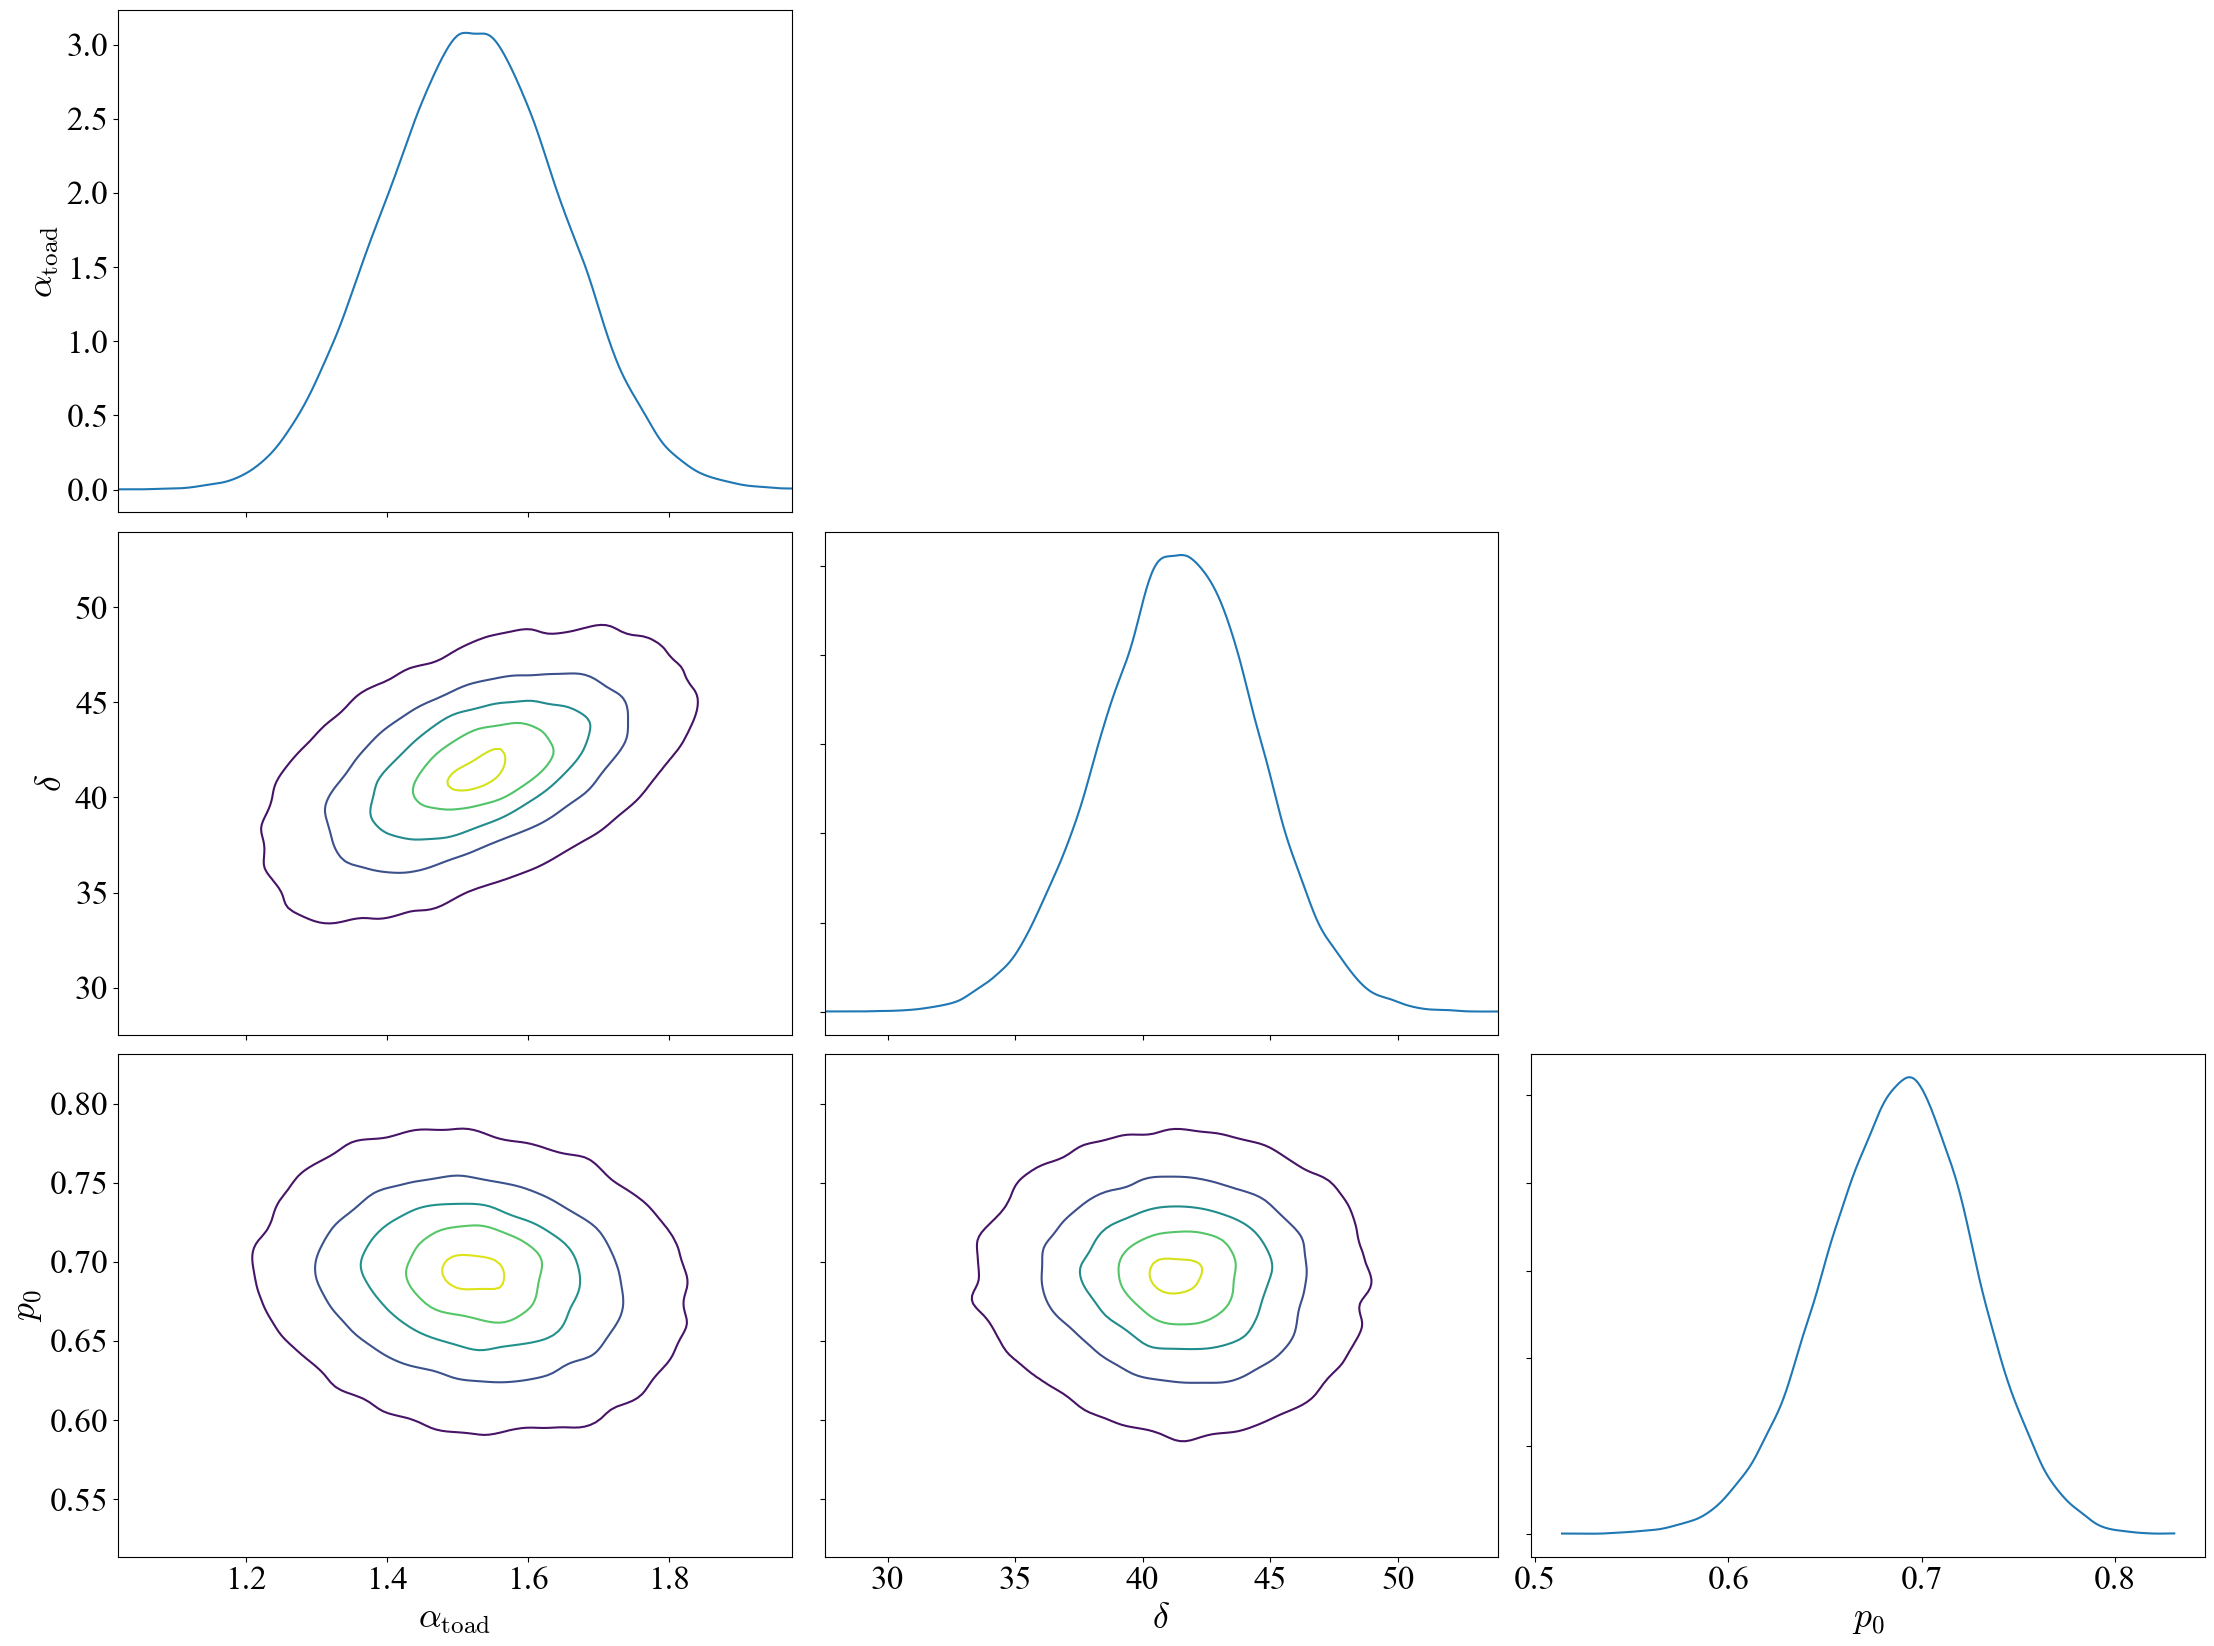

In [6]:
az.plot_pair(rsnl_theta_plot,
             kind='kde',
            #  reference_values=reference_values,
             marginals=True,
             labeller=az.labels.MapLabeller(var_name_map=var_name_map),
            #  reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
             kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                         'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
                         'contourf_kwargs': {"alpha":0}},
             textsize=24,
            )
plt.tight_layout()
plt.savefig("plots/toad_theta_posterior.pdf", bbox_inches='tight')

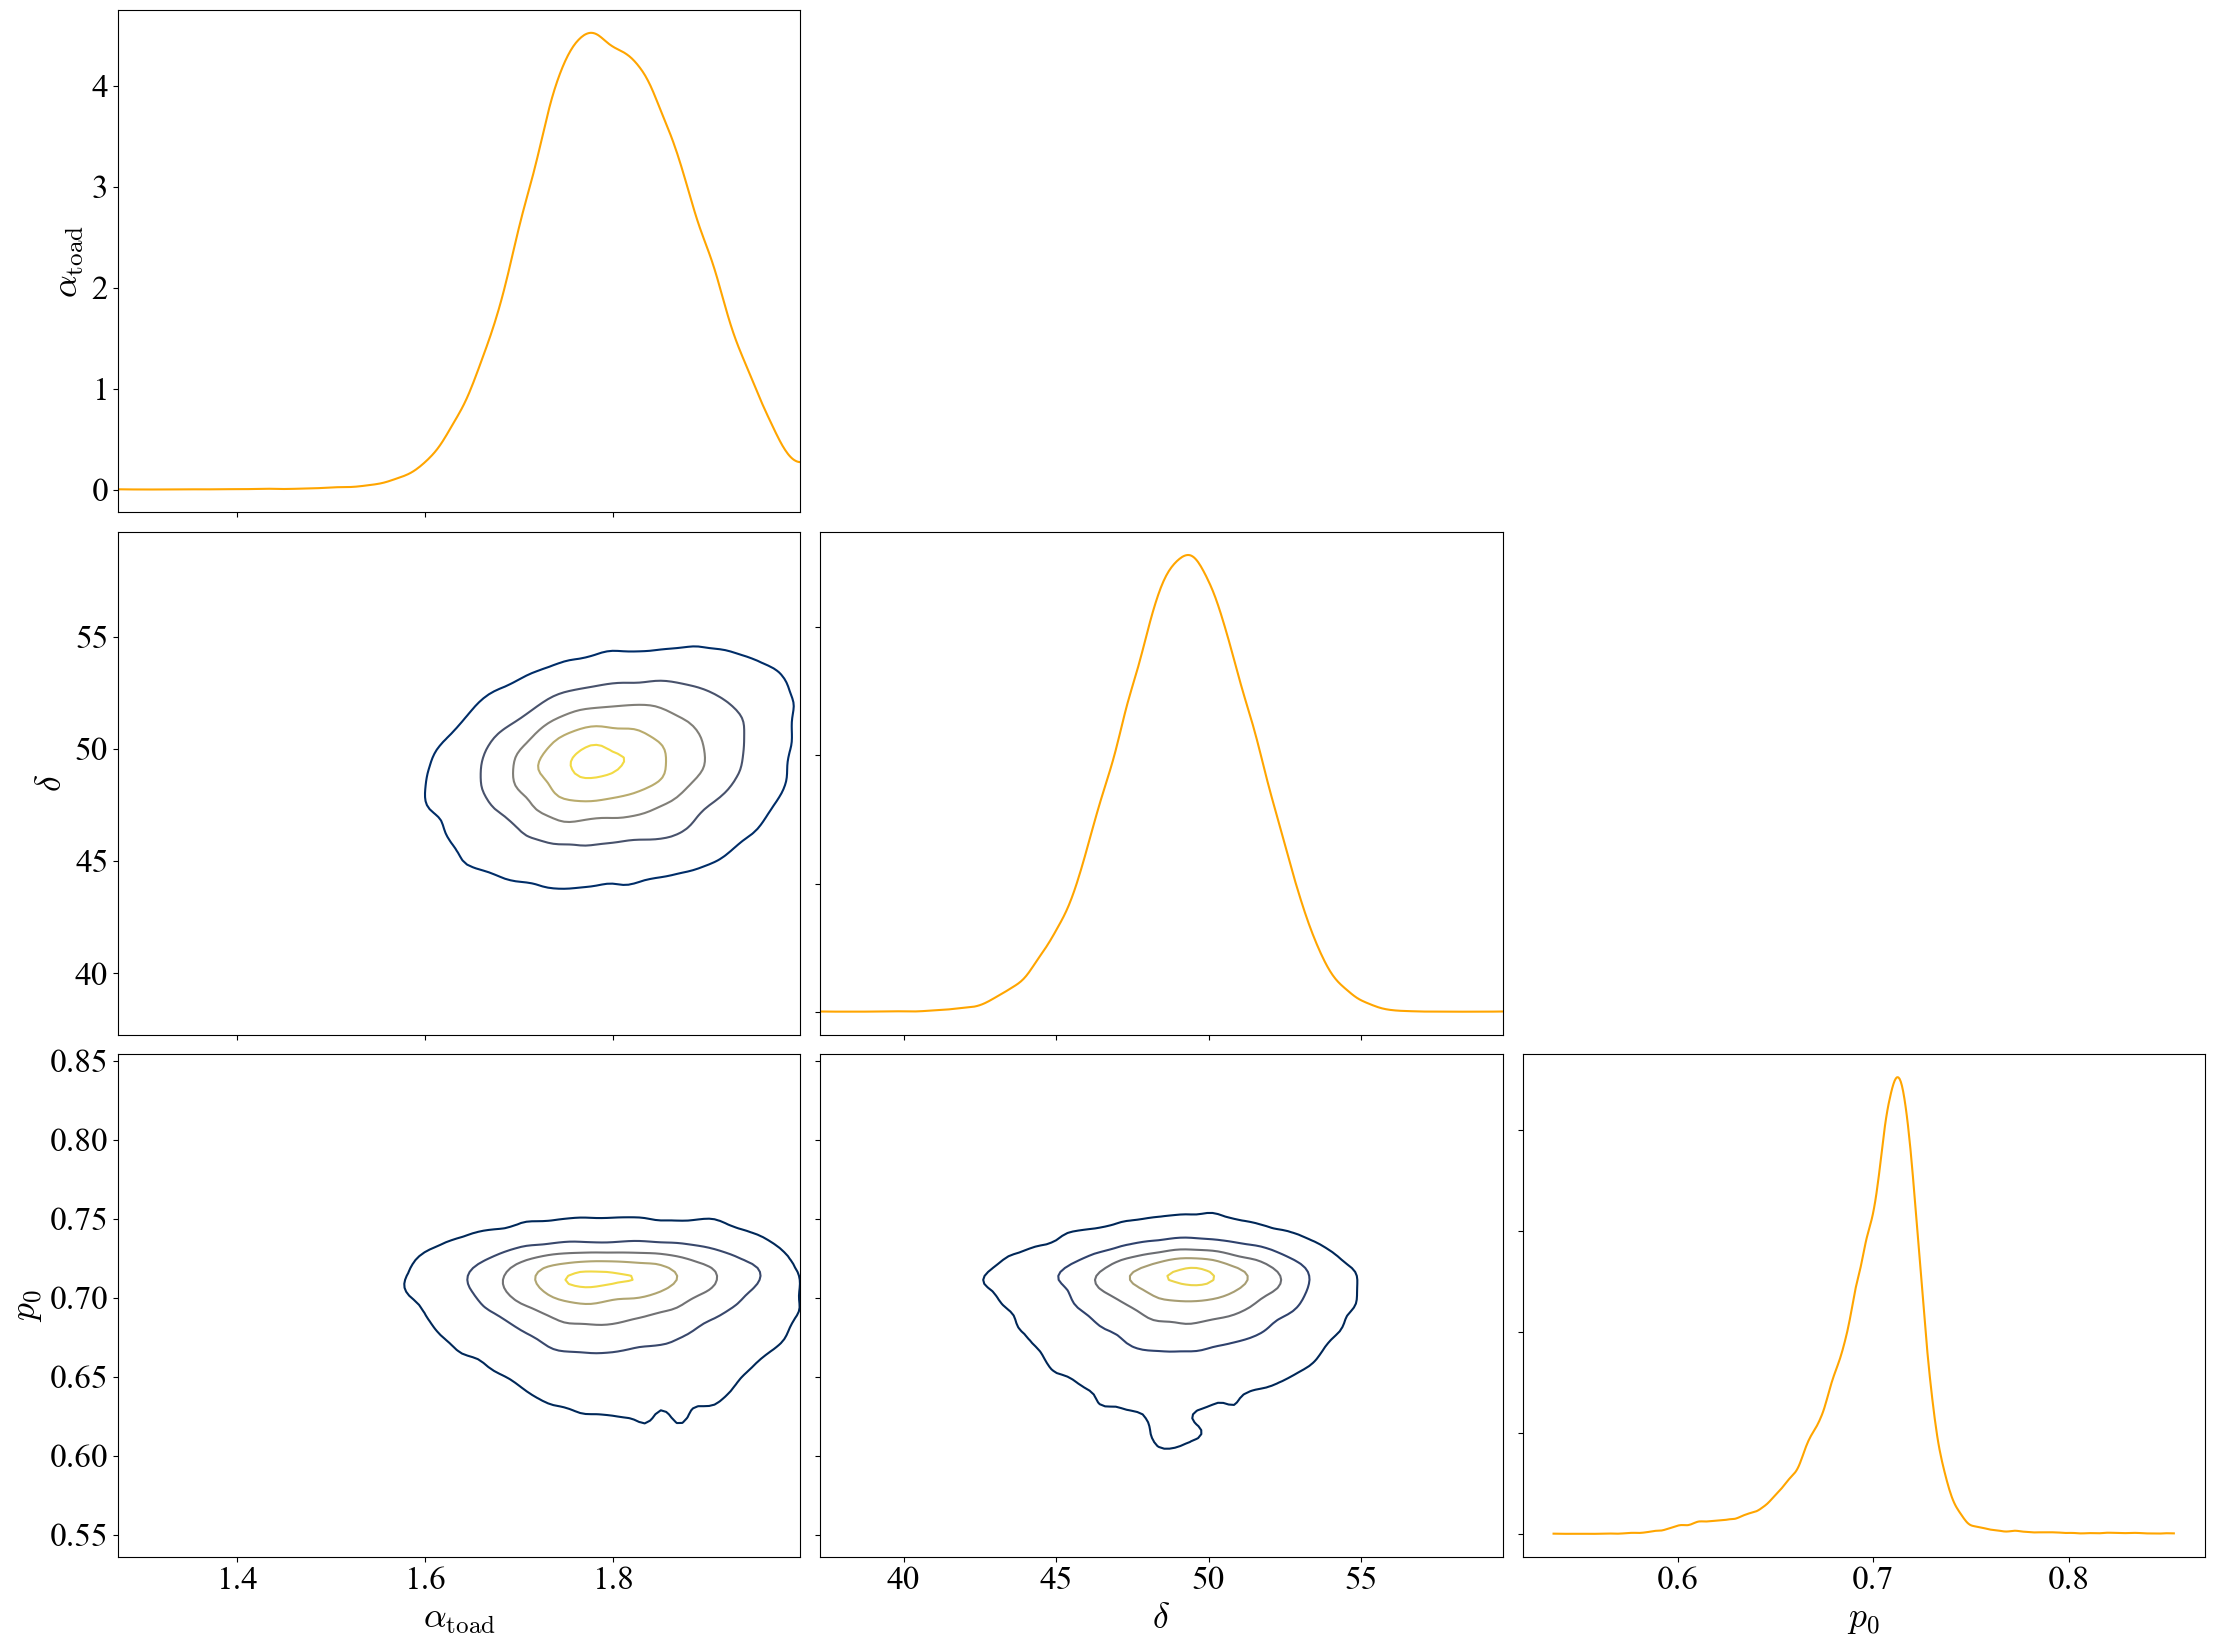

In [7]:
az.plot_pair(snl_theta_plot,
             kind='kde',
            #  reference_values=reference_values,
             marginals=True,
             labeller=az.labels.MapLabeller(var_name_map=var_name_map),
            #  reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
             kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                         'contour_kwargs': {"colors":None, "cmap":plt.cm.cividis},
                         'contourf_kwargs': {"alpha":0}},
             marginal_kwargs={'color': 'orange'},
             textsize=24,
            )
plt.tight_layout()
plt.savefig("plots/toad_snl_theta_posterior.pdf", bbox_inches='tight')
# plt.xlabel(rf"$\theta_1$")

In [8]:
with open('../res/external_res/rnpe_toad_res.pkl', 'rb') as f:
    res = pkl.load(f)

import scipy.io
thetas_rbsl = scipy.io.loadmat('../res/external_res/results_bsl_model2_realdata_mean_n500.mat')['theta']

thetas_rnpe = res['posterior_samples']['RNPE']

rnpe_theta_plot = {}
rbsl_theta_plot = {}
for i in range(3):
    rnpe_theta_plot['theta' + str(i+1)] = thetas_rnpe[ :, 0, i]
    rbsl_theta_plot['theta' + str(i+1)] = thetas_rbsl[ :, i]


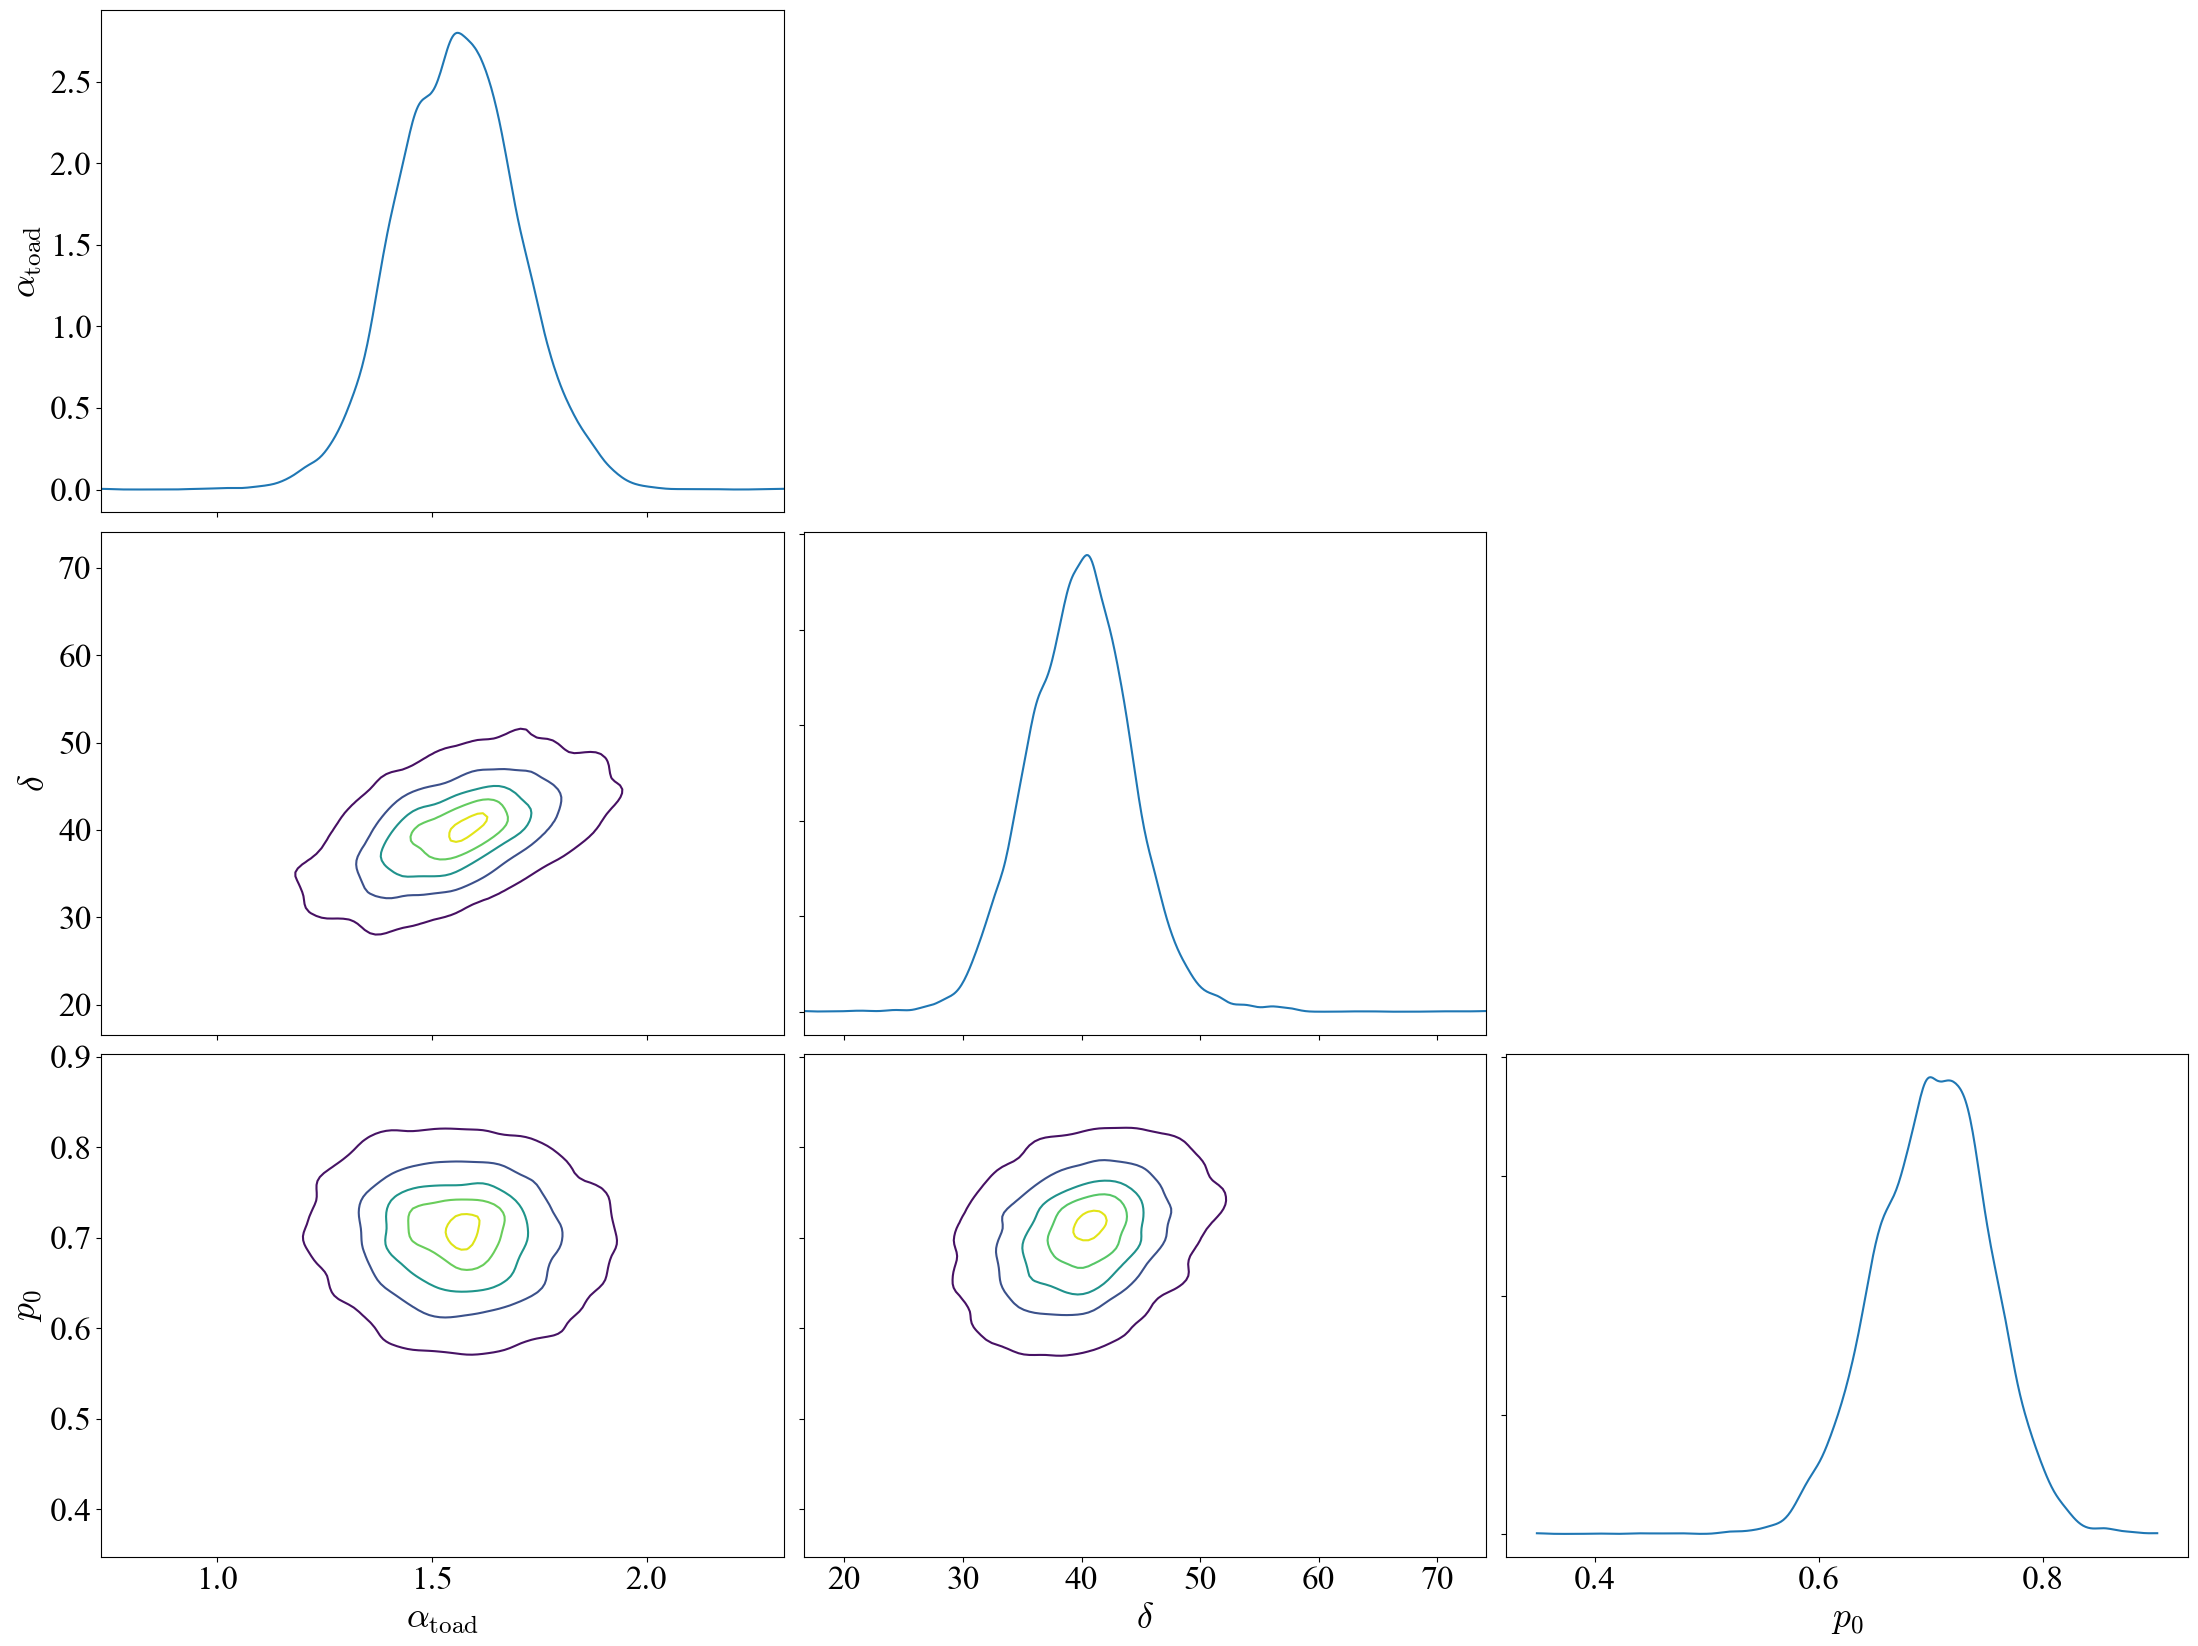

In [9]:
az.plot_pair(rnpe_theta_plot,
             kind='kde',
            #  reference_values=reference_values,
             marginals=True,
             labeller=az.labels.MapLabeller(var_name_map=var_name_map),
            #  reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
             kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                         'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
                         'contourf_kwargs': {"alpha":0}},
             textsize=24,
            )
plt.tight_layout()
plt.savefig("plots/toad_rnpe_theta_posterior.pdf", bbox_inches='tight')

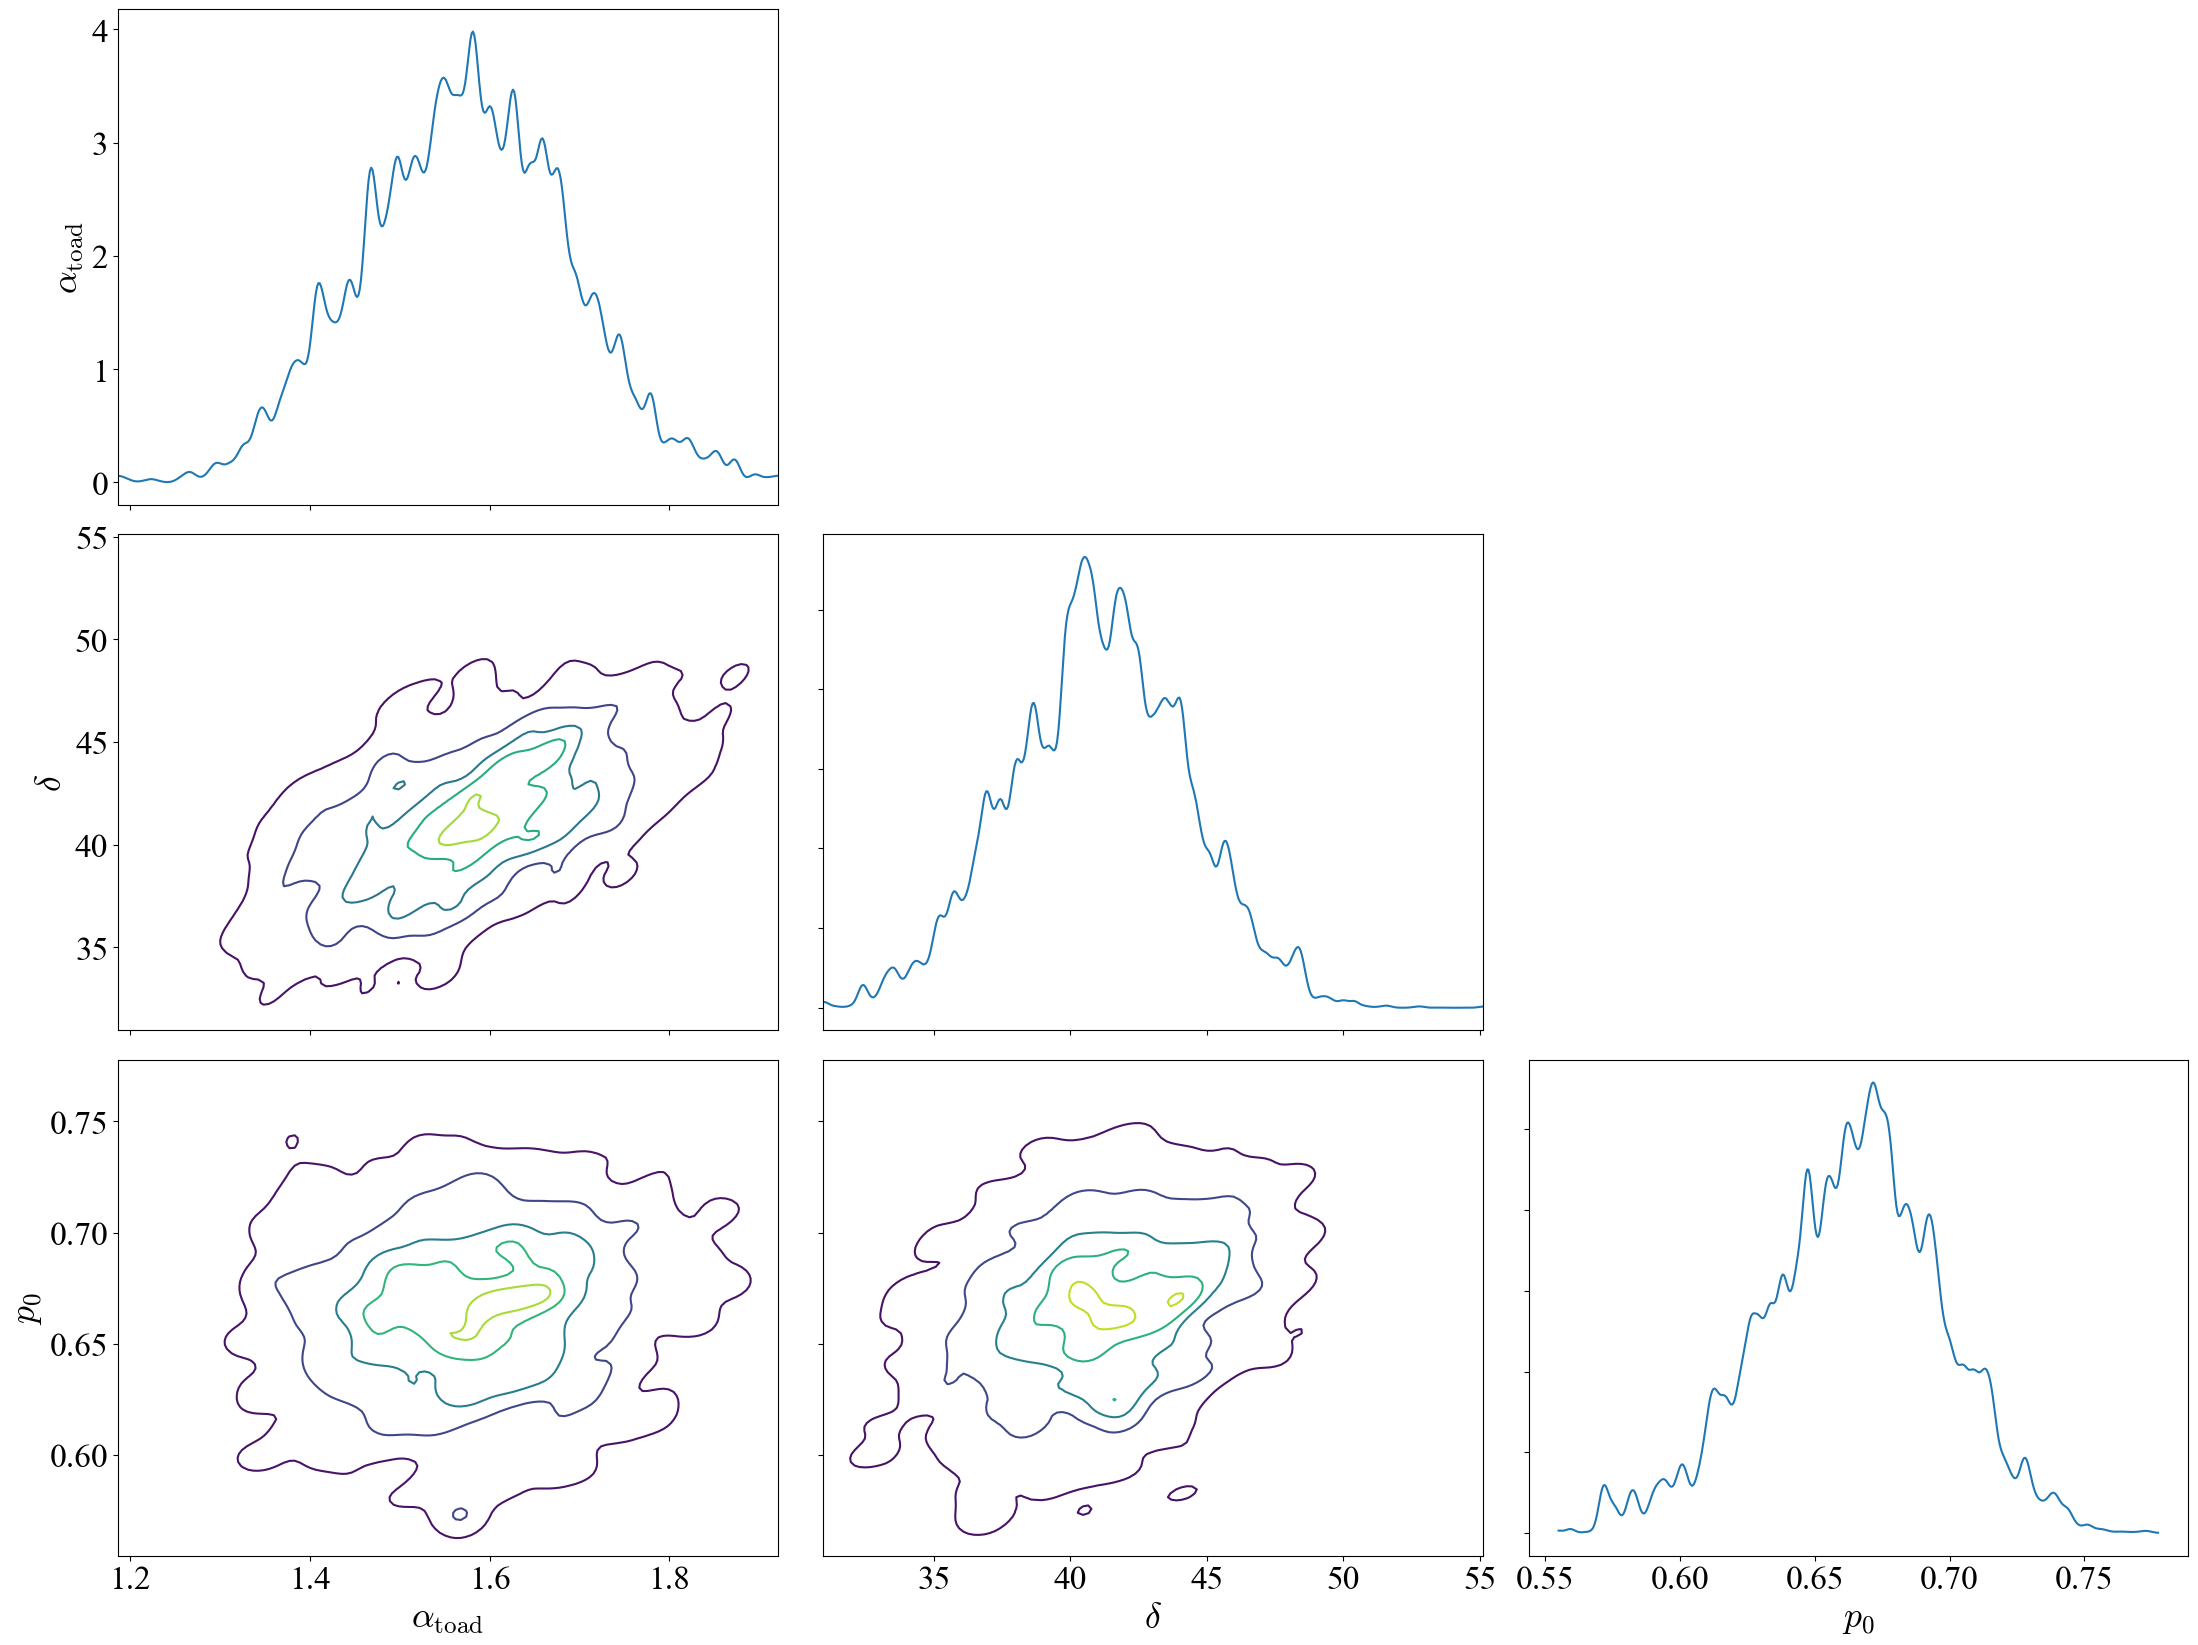

In [10]:
az.plot_pair(rbsl_theta_plot,
             kind='kde',
            #  reference_values=reference_values,
             marginals=True,
             labeller=az.labels.MapLabeller(var_name_map=var_name_map),
            #  reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
             kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                         'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
                         'contourf_kwargs': {"alpha":0}},
             textsize=24,
            )
plt.tight_layout()
plt.savefig("plots/toad_rbsl_theta_posterior.pdf", bbox_inches='tight')

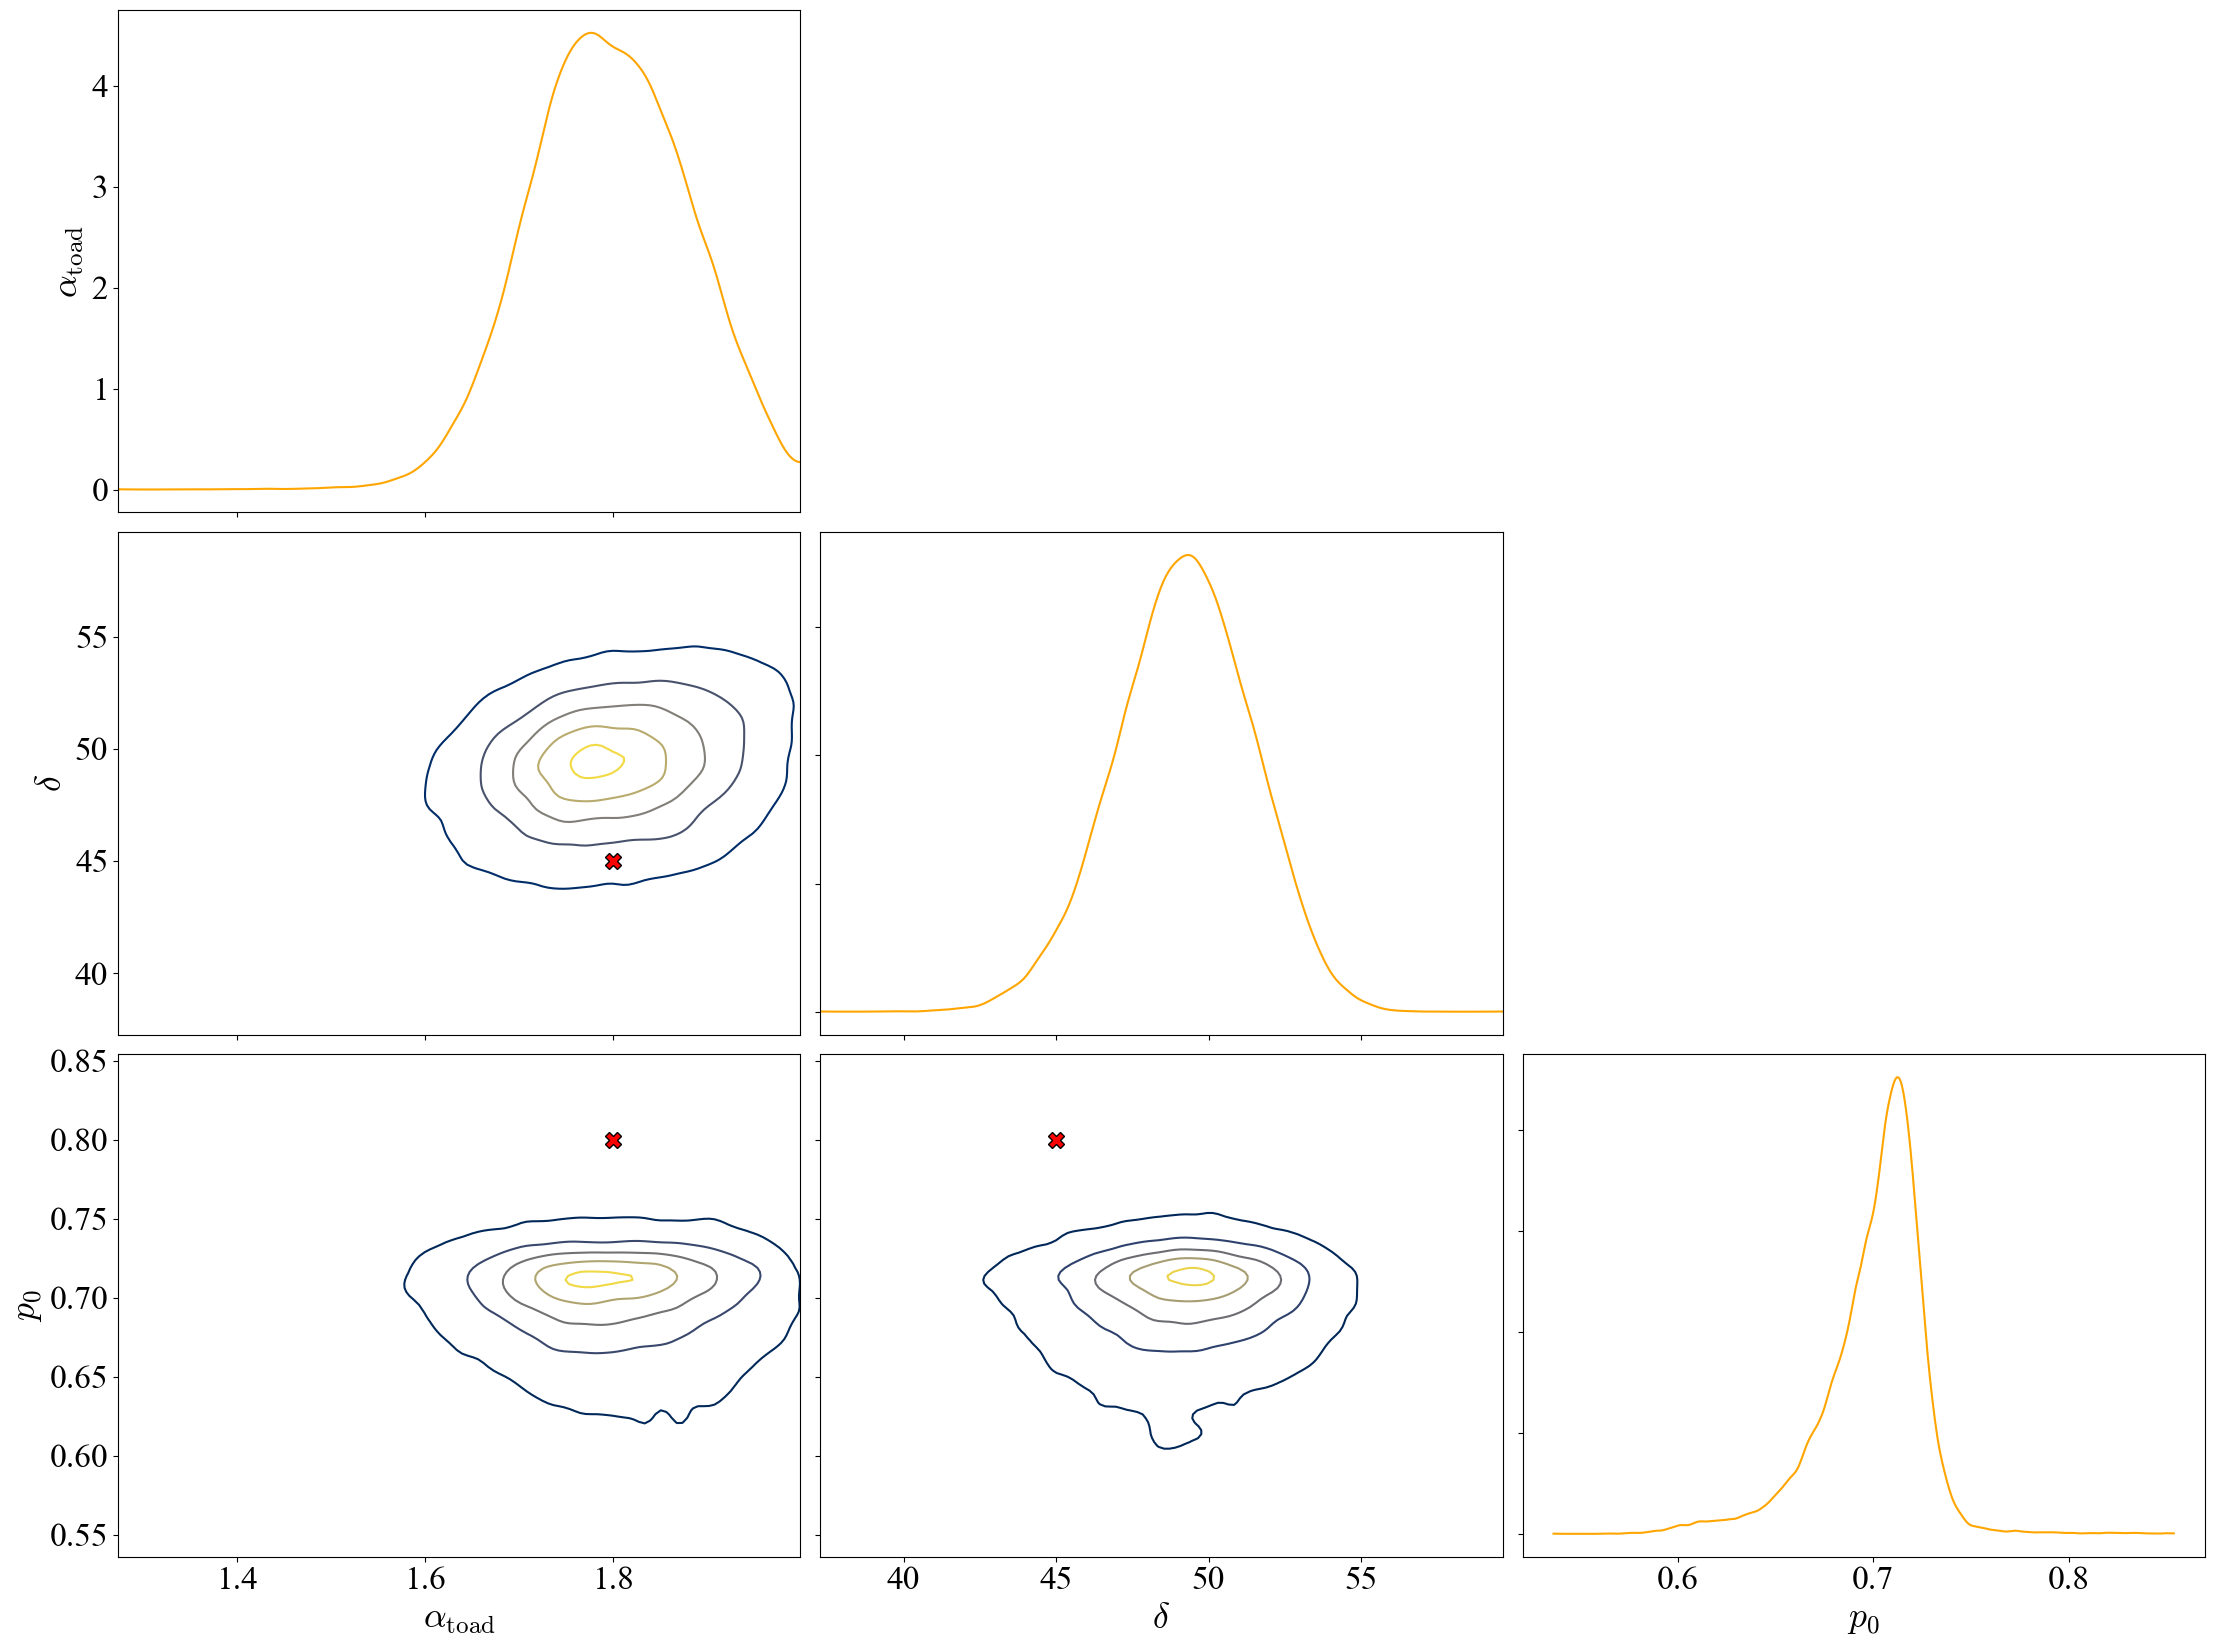

In [11]:
az.plot_pair(snl_theta_plot,
             kind='kde',
             reference_values=reference_values,
             marginals=True,
             labeller=az.labels.MapLabeller(var_name_map=var_name_map),
             reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
             kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                         'contour_kwargs': {"colors":None, "cmap":plt.cm.cividis},
                         'contourf_kwargs': {"alpha":0}},
             marginal_kwargs={'color': 'orange'},
             textsize=24,
            )
plt.tight_layout()
plt.savefig("plots/toad_snl_theta_posterior.pdf", bbox_inches='tight')
# plt.xlabel(rf"$\theta_1$")

In [12]:
# Set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'cm'


rng_key = random.PRNGKey(48)
prior_samples = random.laplace(rng_key, shape=(10000, 2))

for i in range(48):
    az.plot_dist(adj_params[:, i],
                 label='Posterior',
                 color='black')
    az.plot_dist(prior_samples[:, i],
                 color=mcolors.CSS4_COLORS['limegreen'],
                 plot_kwargs={'linestyle': 'dashed'},
                 label='Prior')

    plt.xlabel("$\gamma_{%s}$" % (i+1), fontsize=25)
    plt.ylabel("Density", fontsize=25)
    plt.xlim([-10, 10])
    plt.xticks([-10, -5, 0, 5, 10], fontsize=25)
    plt.yticks(fontsize=25)
    plt.ylim(bottom=0)
    plt.legend(fontsize=25,
               loc='upper left',
               borderpad=0.1, labelspacing=0.1, handletextpad=0.1)

    plt.tight_layout()
    plt.savefig(f'plots/toad_adj_param_{i+1}.pdf', bbox_inches='tight')
    plt.clf()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/428061280.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/428061280.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/428061280.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/428061280.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/428061280.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/428061280.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/42806

<Figure size 640x480 with 0 Axes>

In [13]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 25})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams["axes.unicode_minus"] = False

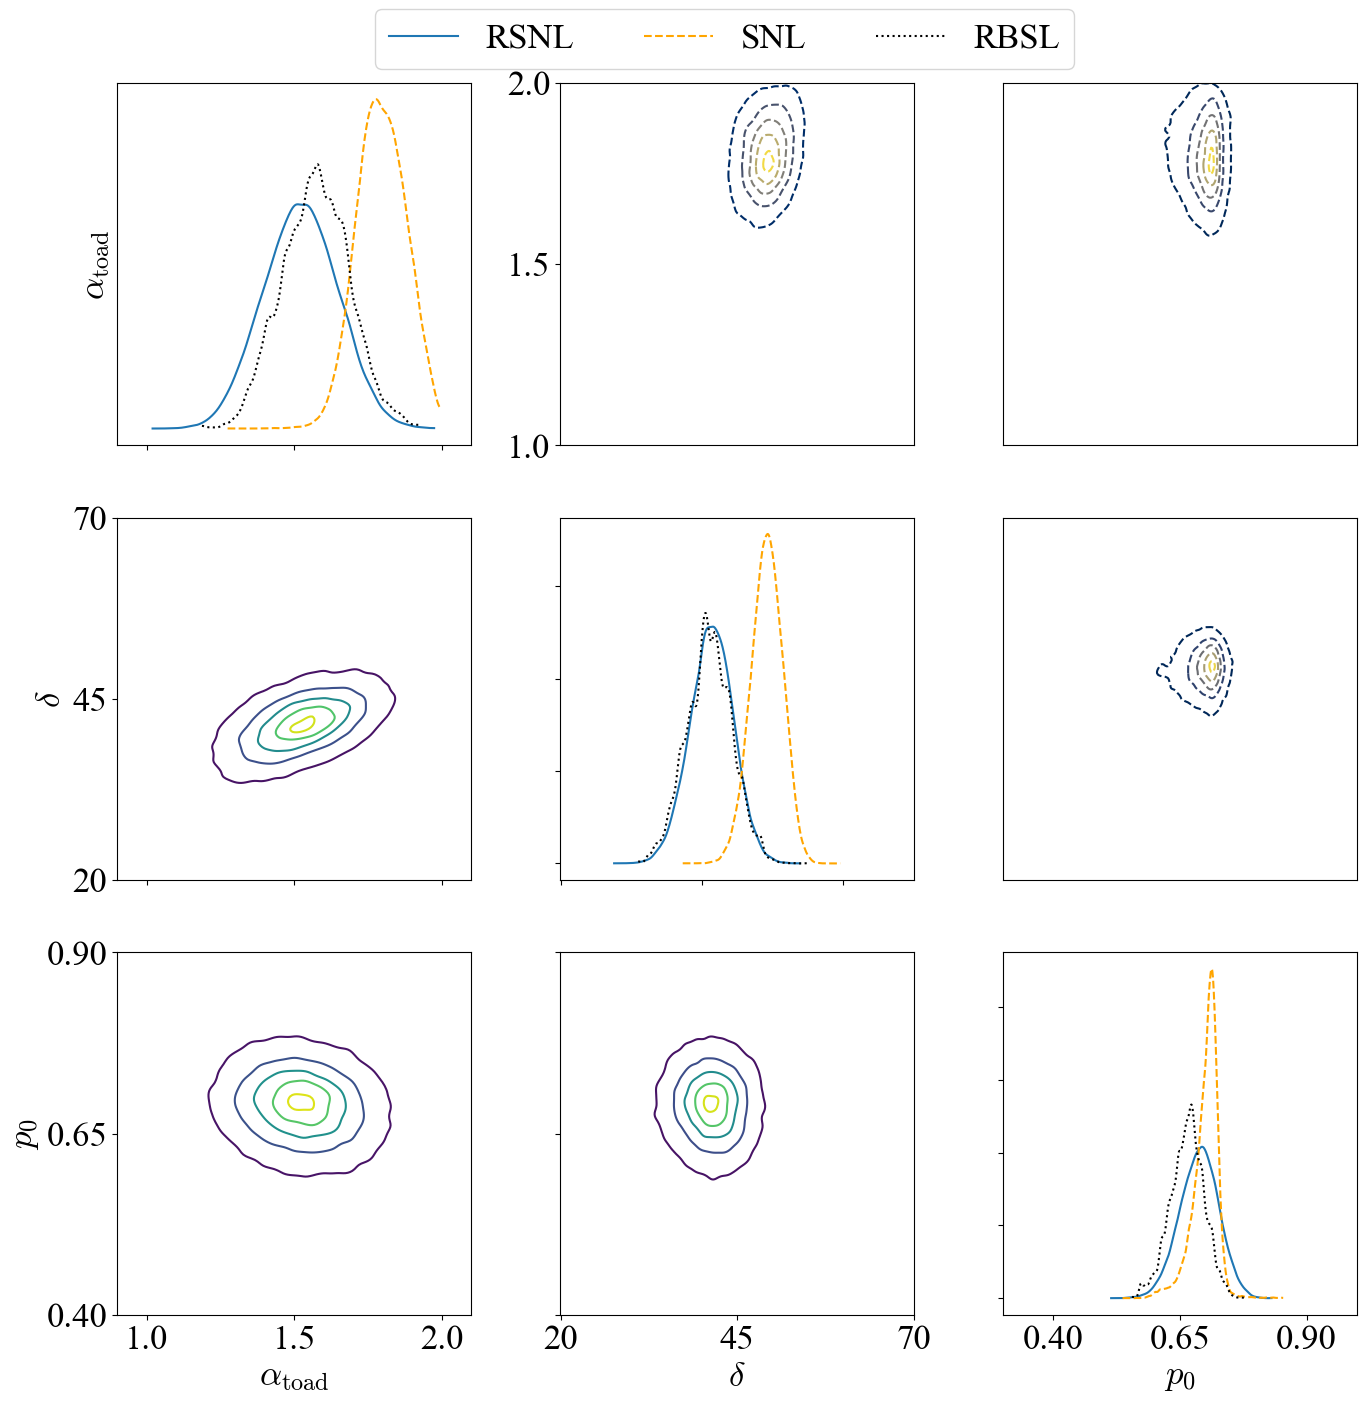

In [14]:
fig, axes = plt.subplots(3, 3, sharey=False, figsize=(16, 16))

old_axes = np.empty((3, 3), dtype='object')

lower_bounds = [1.0, 20.0, 0.4]
upper_bounds = [2.0, 70.0, 0.9]

for i in range(3):
    for j in range(3):
        axes[i][j].set_xlim([lower_bounds[j]-0.1, upper_bounds[j]+0.1])
        old_axes[i][j] = axes[i][j].axes

axes = az.plot_pair(rsnl_theta_plot,
                    kind='kde',
                    kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                                'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
                                'contourf_kwargs': {"alpha":0}},
                    ax=axes,
                    labeller=az.labels.MapLabeller(var_name_map=var_name_map,),
                    marginals=True,
                    marginal_kwargs={'label': 'RSNL'},
                    )

curr_fig = plt.gcf()
for ii, ax_ii in enumerate(axes):
    for jj, ax_jj in enumerate(ax_ii):
        if ii == jj:  # only marginal for now
            az.plot_dist(snl_theta_plot['theta' + str(ii+1)],
                         ax=ax_jj,
                         color='orange',
                         plot_kwargs={'linestyle': 'dashed'},
                         label='SNL'
                         )
            az.plot_dist(rbsl_theta_plot['theta' + str(ii+1)],
                         ax=ax_jj,
                         bw='silverman',
                         color='black',
                         plot_kwargs={'linestyle': 'dotted'},
                         label='RBSL')
            if ii != 0:
                ax_jj.get_legend().remove()
            else:
                ax_jj.legend(bbox_to_anchor=(2.75, 1.25), ncol=3)
        if ii < jj:
            ax_jj._remove_method = None
            ax_jj.figure = curr_fig
            ax_jj.set_visible(True)
            ax_jj = az.plot_kde(snl_theta_plot['theta' + str(jj+1)],
                                snl_theta_plot['theta' + str(ii+1)],
                                ax=ax_jj,
                                hdi_probs=[0.05, 0.25, 0.5, 0.75, 0.95],
                                contour_kwargs={"colors": None, "cmap":plt.cm.cividis, 'linestyles': 'dashed'},
                                contourf_kwargs={"alpha":0}, show=False)
            ax_jj.axes = old_axes[ii, jj]
            ax_jj.axes.get_xaxis().set_visible(False)
            ax_jj.axes.get_yaxis().set_visible(False)
            fig.add_subplot(ax_jj)
for i in range(3):
    for j in range(3):
        if i != j:
            axes[i][j].set_xticks([lower_bounds[j], (lower_bounds[j] + upper_bounds[j])/2, upper_bounds[j]])
            axes[i][j].set_yticks([lower_bounds[i], (lower_bounds[i] + upper_bounds[i])/2, upper_bounds[i]])
        if i == 0 and j == 1:
            axes[i][j].get_yaxis().set_visible(True)
            axes[i][j].tick_params(left=True, labelleft=True)
        else:
            if i == 0:
                axes[i][j].set_yticks([])
                axes[i][j].tick_params(left=False, labelleft=False)
            if i == 2:
                axes[i][j].set_xticks([lower_bounds[j], (lower_bounds[j] + upper_bounds[j])/2, upper_bounds[j]])

plt.subplots_adjust(wspace=0.25)  # adjust the space between the subplots
plt.savefig("plots/toad_joint_real_data.pdf", bbox_inches='tight')

In [15]:
# Set up sim data
with open("../res/toad/rsnl_sim/seed_0/thetas.pkl", "rb") as f:
    theta_sim_draws_rsnl = jnp.array(pkl.load(f))

thetas_sim_rsnl = jnp.concatenate(theta_sim_draws_rsnl, axis=0)
thetas_sim_rsnl = jnp.squeeze(thetas_sim_rsnl)

with open("../res/toad/rsnl_sim/seed_0/adj_params.pkl", "rb") as f:
    adj_params_sim = jnp.array(pkl.load(f))

adj_params_sim = jnp.concatenate(adj_params_sim, axis=0)

with open("../res/toad/snl_sim/seed_0/thetas.pkl", "rb") as f:
    theta_sim_draws_snl = jnp.array(pkl.load(f))

thetas_sim_snl = jnp.concatenate(theta_sim_draws_snl, axis=0)
thetas_sim_snl = jnp.squeeze(thetas_sim_snl)

thetas_sim_rbsl = scipy.io.loadmat('../res/external_res/results_bsl_model2_simdata_variance_n300.mat')['theta']


In [16]:
rsnl_sim_theta_plot = {}
snl_sim_theta_plot = {}
rbsl_sim_theta_plot = {}

for i in range(3):
    rsnl_sim_theta_plot['theta' + str(i+1)] = thetas_sim_rsnl[ :, i]
    snl_sim_theta_plot['theta' + str(i+1)] = thetas_sim_snl[:, i]
    rbsl_sim_theta_plot['theta' + str(i+1)] = thetas_sim_rbsl[:, i]

var_name_map = {}
reference_values = {}
labels = [r'$\alpha_{\mathrm{toad}}$', r'$\delta$', r'$p_0$']
for ii, k in enumerate(rsnl_sim_theta_plot):
    var_name_map[k] = labels[ii]
    reference_values[var_name_map[k]] = true_params[ii]  # why does ref_vals match labels and not data? ah well

jj
jj
jj
i:  0 j:  1
i:  0 j:  2
i:  1 j:  0
i:  1 j:  2
i:  2 j:  0
i:  2 j:  1


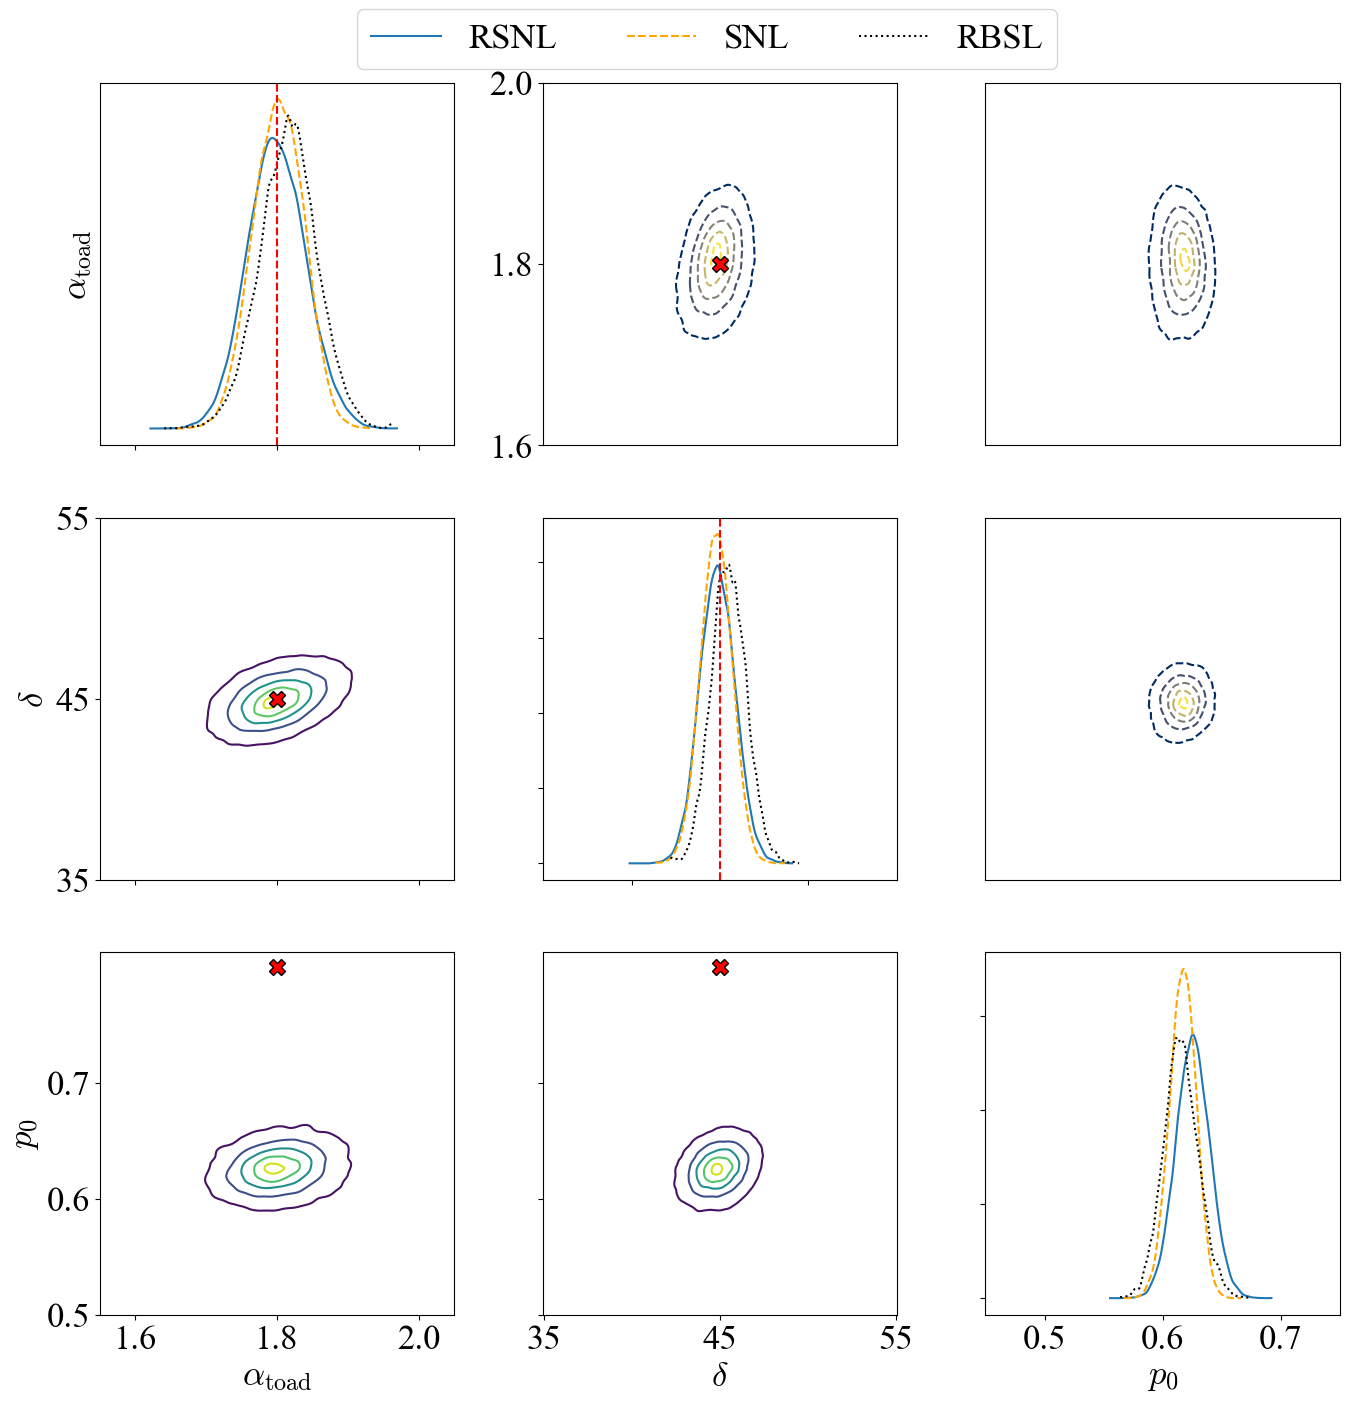

In [17]:
# sim posterior plot
fig, axes = plt.subplots(3, 3, sharey=False, figsize=(16, 16))

old_axes = np.empty((3, 3), dtype='object')
lower_bounds = [1.6, 35.0, 0.5]
upper_bounds = [2.0, 55.0, 0.7]

for i in range(3):
    for j in range(3):
        axes[i][j].set_xlim([lower_bounds[j]-0.05, upper_bounds[j]+0.05])
        old_axes[i][j] = axes[i][j].axes


axes = az.plot_pair(rsnl_sim_theta_plot,
                    kind='kde',
                    reference_values=reference_values,
                    reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
                    kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                                'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
                                'contourf_kwargs': {"alpha":0}},
                    ax=axes,
                    labeller=az.labels.MapLabeller(var_name_map=var_name_map,),
                    marginals=True,
                    marginal_kwargs={'label': 'RSNL'},
                    )

curr_fig = plt.gcf()
for ii, ax_ii in enumerate(axes):
    for jj, ax_jj in enumerate(ax_ii):
        if ii == jj:  # only marginal for now
            az.plot_dist(snl_sim_theta_plot['theta' + str(ii+1)],ax=ax_jj, color='orange', plot_kwargs={'linestyle': 'dashed'}, label='SNL')
            az.plot_dist(rbsl_sim_theta_plot['theta' + str(ii+1)],ax=ax_jj, bw='silverman', color='black', plot_kwargs={'linestyle': 'dotted'}, label='RBSL')
            if ii != 0:
                ax_jj.get_legend().remove()
            else:
                ax_jj.legend(bbox_to_anchor=(2.75, 1.25), ncol=3)
            ax_jj.axvline(x=true_params[jj], color='red', linestyle='dashed')
        if ii < jj:
            print('jj')
            ax_jj._remove_method = None
            ax_jj.figure = curr_fig
            ax_jj.set_visible(True)
            ax_jj = az.plot_kde(snl_sim_theta_plot['theta' + str(jj+1)],
                                snl_sim_theta_plot['theta' + str(ii+1)],
                                ax=ax_jj,
                                hdi_probs=[0.05, 0.25, 0.5, 0.75, 0.95],
                                contour_kwargs={"colors": None, "cmap":plt.cm.cividis, 'linestyles': 'dashed'},
                                contourf_kwargs={"alpha":0}, show=False)
            ax_jj.plot(true_params[jj], true_params[ii], color='red', marker= 'X', markersize=12, markeredgecolor='k')
            ax_jj.axes = old_axes[ii, jj]
            ax_jj.axes.get_xaxis().set_visible(False)
            ax_jj.axes.get_yaxis().set_visible(False)
            fig.add_subplot(ax_jj)
for i in range(3):
    for j in range(3):
        if i != j:
            print('i: ', i, 'j: ', j)
            axes[i][j].set_xticks([lower_bounds[j], (lower_bounds[j] + upper_bounds[j])/2, upper_bounds[j]])
            axes[i][j].set_yticks([lower_bounds[i], (lower_bounds[i] + upper_bounds[i])/2, upper_bounds[i]])
        if i == 0 and j == 1:
            axes[i][j].get_yaxis().set_visible(True)
            axes[i][j].tick_params(left=True, labelleft=True)
        else:
            if i == 0:
                axes[i][j].set_yticks([])
                axes[i][j].tick_params(left=False, labelleft=False)
            if i == 2:
                axes[i][j].set_xticks([lower_bounds[j], (lower_bounds[j] + upper_bounds[j])/2, upper_bounds[j]])

plt.subplots_adjust(wspace=0.25)  # adjust the space between the subplots
plt.savefig("plots/toad_joint_sim_data.pdf", bbox_inches='tight')

## Posterior Predictive Plots

In [18]:
import scipy.io
from functools import partial

In [19]:
thetas_rbsl = scipy.io.loadmat('../res/external_res/results_bsl_model2_realdata_mean_n500.mat')['theta']

In [20]:
def get_real_xobs():
    df = scipy.io.loadmat('../rsnl/examples/data/radio_converted.mat')['Y']
    nan_idx = jnp.isnan(df)
    df = jnp.array(df)

    x_obs = calculate_summary_statistics(df, real_data=True, nan_idx=nan_idx)

    sum_fn = partial(calculate_summary_statistics, real_data=True,
                     nan_idx=nan_idx)
    return x_obs, sum_fn


In [21]:
rng_key = random.PRNGKey(0)
rng_key, sub_key1, sub_key2 = random.split(rng_key, 3)
sum_fn = calculate_summary_statistics
x_obs, sum_fn = get_real_xobs()


In [22]:
# # first just do first summary
# NOTE: CAN COMMENT THIS OUT IF YOU HAVE ALREADY RUN IT
thetas_rnpe = thetas_rnpe.reshape((10000, -1))

n_sims = 1_000
rsnl_ssx = np.zeros((48, n_sims))
rnpe_ssx = np.zeros((48, n_sims))
snl_ssx = np.zeros((48, n_sims))
rbsl_ssx = np.zeros((48, n_sims))

stride = 10

for i in range(n_sims):
    if i % 100 == 0:
        print('i: ', i)
    key, sub_key1, sub_key2, sub_key3, sub_key4 = random.split(rng_key, 5)
    idx = i * stride
    x_rsnl = dgp(sub_key1, thetas_rsnl[idx, 0], thetas_rsnl[idx, 1], thetas_rsnl[idx,2], model=2)
    rsnl_ssx[:, i] = sum_fn(x_rsnl)

    x_rnpe = dgp(sub_key2, thetas_rnpe[idx, 0], thetas_rnpe[idx, 1], thetas_rnpe[idx,2], model=2)
    rnpe_ssx[:, i] = sum_fn(x_rnpe)

    x_snl = dgp(sub_key3, thetas_snl[idx, 0], thetas_snl[idx, 1], thetas_snl[idx,2], model=2)
    snl_ssx[:, i] = sum_fn(x_snl)

    x_rbsl = dgp(sub_key4, thetas_rbsl[idx, 0], thetas_rbsl[idx, 1], thetas_rbsl[idx,2], model=2)
    rbsl_ssx[:, i] = sum_fn(x_rbsl)


pkl.dump(rsnl_ssx, open('rsnl_ssx.pkl', 'wb'))
pkl.dump(rnpe_ssx, open('rnpe_ssx.pkl', 'wb'))
pkl.dump(snl_ssx, open('snl_ssx.pkl', 'wb'))
pkl.dump(rbsl_ssx, open('rbsl_ssx.pkl', 'wb'))

i:  0
i:  100
i:  200
i:  300
i:  400
i:  500
i:  600
i:  700
i:  800
i:  900


In [23]:
rsnl_ssx = pkl.load(open('rsnl_ssx.pkl', 'rb'))
rnpe_ssx = pkl.load(open('rnpe_ssx.pkl', 'rb'))
snl_ssx = pkl.load(open('snl_ssx.pkl', 'rb'))
rbsl_ssx = pkl.load(open('rbsl_ssx.pkl', 'rb'))

In [24]:
for i in range(48):
    rsnl_first_summary = rsnl_ssx[i, :].flatten()
    rsnl_first_summary = rsnl_first_summary[np.where(np.abs(rsnl_first_summary) < 10000)]
    rsnl_xs = np.linspace(np.min(rsnl_first_summary), np.max(rsnl_first_summary), 100)
    kde = gaussian_kde(rsnl_first_summary)
    plt.plot(rsnl_xs, kde(rsnl_xs), label='RSNL')

    rnpe_first_summary = rnpe_ssx[i, :].flatten()
    rnpe_first_summary = rnpe_first_summary[np.where(np.abs(rnpe_first_summary) < 10000)]
    rnpe_xs = np.linspace(np.min(rnpe_first_summary), np.max(rnpe_first_summary), 100)
    kde = gaussian_kde(rnpe_first_summary)
    plt.plot(rnpe_xs, kde(rnpe_xs), label='RNPE')

    snl_first_summary = snl_ssx[i, :].flatten()
    snl_first_summary = snl_first_summary[np.where(np.abs(snl_first_summary) < 10000)]
    snl_xs = np.linspace(np.min(snl_first_summary), np.max(snl_first_summary), 100)
    kde = gaussian_kde(snl_first_summary)
    plt.plot(snl_xs, kde(snl_xs), label='SNL')

    rbsl_summary = rbsl_ssx[i, :].flatten()
    rbsl_summary = rbsl_summary[np.where(np.abs(rbsl_summary) < 10000)]
    rbsl_xs = np.linspace(np.min(rbsl_summary), np.max(rbsl_summary), 100)
    kde = gaussian_kde(rbsl_summary)
    plt.plot(rbsl_xs, kde(rbsl_xs), label='RBSL')

    plt.plot(x_obs[i], 0, 'x', color='red')
    plt.legend()
    plt.savefig(f"plots/ppc_{str(i)}.pdf", bbox_inches="tight")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [25]:
# RBF kernel function
def rbf_kernel(x, y, lengthscale=1.0):
    return jnp.exp(-jnp.sum((x - y) ** 2) / (2 * lengthscale ** 2))

# Median heuristic for lengthscale
def median_heuristic(x):
    pairwise_dists = jnp.sqrt(jnp.sum((x[:, :, None] - x[:, None, :]) ** 2, axis=0))
    return jnp.sqrt(jnp.median(pairwise_dists) / 2)

# MMD calculation
def MMD_unweighted(simulated, observed, lengthscale=1):
    l = 1000  # Number of simulated statistics to use
    simulated = simulated[:, :l]  # Take only the first l samples

    # Compute pairwise kernel values for simulated statistics
    k_simulated = jnp.array([[rbf_kernel(x, y, lengthscale) for x in simulated.T] for y in simulated.T])

    # Compute kernel values between simulated and observed statistics
    k_sim_obs = jnp.array([rbf_kernel(x, observed, lengthscale) for x in simulated.T])

    # Calculate MMD
    mmd_value = (jnp.sum(k_simulated) / (l ** 2)) - (2 * jnp.sum(k_sim_obs) / l)

    return mmd_value



In [26]:
lengthscale_beta = median_heuristic(rsnl_ssx)

print('lengthscale_beta: ', lengthscale_beta)

rsnl_mmd = MMD_unweighted(rsnl_ssx, x_obs.reshape((-1, 1)), lengthscale_beta)
print("RSNL: ", rsnl_mmd)

lengthscale_beta:  4.6125255
RSNL:  0.0061002155


In [27]:
lengthscale_beta = median_heuristic(snl_ssx)
MMD_unweighted(snl_ssx, x_obs.reshape((-1, 1)), lengthscale_beta)

Array(0.01527602, dtype=float32)

In [28]:
lengthscale_beta = median_heuristic(rnpe_ssx)
MMD_unweighted(rnpe_ssx, x_obs.reshape((-1, 1)), lengthscale_beta)

KeyboardInterrupt: 

In [ ]:
rbsl_ssx = scipy.io.loadmat('../res/external_res/ssx_rbslm.mat')['ssx_all'].T
# ssx_bsl.shape
rbsl_ssx = rbsl_ssx[0:10000:10]
# lengthscale_beta = median_heuristic(rbsl_ssx)
# MMD_unweighted(rbsl_ssx, x_obs.reshape((-1, 1)), lengthscale_beta)

: 

In [31]:
# PPC for log non-ret
# Start with observed data
observed_df = scipy.io.loadmat('../rsnl/examples/data/radio_converted.mat')['Y']
nan_idx = jnp.isnan(observed_df)


In [32]:
from matplotlib import cm

In [33]:
lags = [1, 2, 4, 8]
X = observed_df
x_obs = calculate_summary_statistics(observed_df)
non_ret = {}
thd = 10
n_lag_sims = 100
key = random.PRNGKey(0)
colormap = cm.get_cmap('twilight', n_lag_sims)  # Here, n_lag_sims specifies the number of colours needed

num_ret_rsnl = np.zeros((len(lags), n_lag_sims))
for ii, lag in enumerate(lags):
    disp = X[lag:, :] - X[:-lag, :]
    disp = jnp.abs(disp)
    non_ret[f'lag_{str(lag)}'] = sorted(np.log([step for step in disp.flatten() if step > thd]))
    print(len(non_ret[f'lag_{str(lag)}']))
    buffer = 1.0
    if lag == 8:
        buffer = 2.0
    xs_obs = np.linspace(np.min(non_ret[f'lag_{str(lag)}'])-0.5, np.max(non_ret[f'lag_{str(lag)}'])+buffer, 30)
    kde_obs = gaussian_kde(non_ret[f'lag_{str(lag)}'], bw_method='silverman')
    for j in range(n_lag_sims):
        key, sub_key = random.split(key)
        X_i = dgp(sub_key, thetas_rsnl[j, 0], thetas_rsnl[j, 1], thetas_rsnl[j, 2], model=2)
        X_i = X_i.at[nan_idx].set(jnp.nan)
        disp_i = X_i[lag:, :] - X_i[:-lag, :]
        disp_i = jnp.abs(disp_i)
        ret = disp_i < thd
        num_ret_j = np.sum(ret)
        num_ret_rsnl[ii, j] = num_ret_j
        non_ret_i = sorted(np.log([step for step in jnp.abs(disp_i).flatten() if step > thd]))
        xs = np.linspace(np.min(non_ret_i)-0.5, np.max(non_ret_i)+0.5, 30)
        kde = gaussian_kde(non_ret_i, bw_method='silverman')
        color = colormap(j)
        plt.plot(xs, kde(xs), label=f'lag {lag}', alpha=0.1, color=color)
    plt.xlim([0, 10])
    plt.xticks([0, 5, 10])
    plt.ylim([0, 0.7])
    plt.yticks([0, 0.2, 0.4, 0.6])
    plt.ylabel("Density")
    plt.xlabel("Log distance")
    plt.title(f"Lag {str(lag)}")
    plt.plot(xs_obs, kde(xs_obs), label=f'lag {lag}', color='black', linewidth=3)
    plt.savefig(f'plots/ppc_lag_{str(lag)}_rsnl.pdf', bbox_inches='tight')
    plt.clf()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_18925/3971995207.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('twilight', n_lag_sims)  # Here, n_lag_sims specifies the number of colours needed


370
324
220
127


<Figure size 640x480 with 0 Axes>

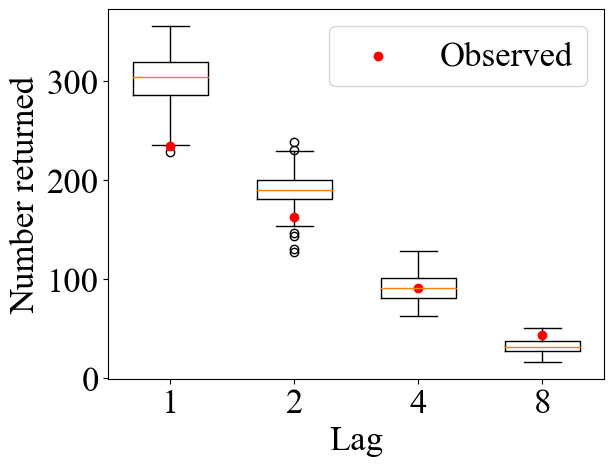

In [34]:
plt.boxplot(num_ret_rsnl.T, positions=range(1, 5), widths=0.6)
plt.scatter(range(1, 5), x_obs[::12], color='red', zorder=2, label='Observed')
plt.xticks(ticks=range(1, 5), labels=["1", "2", "4", "8"])  # Adding custom x-axis labels
plt.xlabel("Lag")
plt.ylabel("Number returned")
plt.legend()
plt.savefig(f'plots/ppc_numret_rsnl.pdf', bbox_inches='tight')

In [ ]:
lags = [1, 2, 4, 8]
X = observed_df
non_ret = {}
thd = 10
n_lag_sims = 100
num_ret_snl = np.zeros((len(lags), n_lag_sims))
for ii, lag in enumerate(lags):
    disp = X[lag:, :] - X[:-lag, :]
    non_ret[f'lag_{str(lag)}'] = sorted(np.log([step for step in jnp.abs(disp).flatten() if step > thd]))
    print(len(non_ret[f'lag_{str(lag)}']))
    xs = np.linspace(np.min(non_ret[f'lag_{str(lag)}']), np.max(non_ret[f'lag_{str(lag)}']), 30)
    kde = gaussian_kde(non_ret[f'lag_{str(lag)}'])
    plt.plot(xs, kde(xs), label=f'lag {lag}')
    for j in range(n_lag_sims):
        key, sub_key = random.split(key)
        X_i = dgp(sub_key, thetas_snl[j, 0], thetas_snl[j, 1], thetas_snl[j,2], model=2)
        X_i = X_i.at[nan_idx].set(jnp.nan)
        disp_i = X_i[lag:, :] - X_i[:-lag, :]
        disp_i = jnp.abs(disp_i)
        ret = disp_i < thd
        num_ret_j = np.sum(ret)
        num_ret_snl[ii, j] = num_ret_j
        non_ret_i = sorted(np.log([step for step in disp_i.flatten() if step > thd]))
        xs = np.linspace(np.min(non_ret_i), np.max(non_ret_i), 30)
        kde = gaussian_kde(non_ret_i)
        plt.plot(xs, kde(xs), label=f'lag {lag}', alpha=0.1)
    plt.savefig(f'plots/ppc_lag_{str(lag)}_snl.pdf', bbox_inches='tight')
    plt.clf()

370
324
220
127


<Figure size 640x480 with 0 Axes>

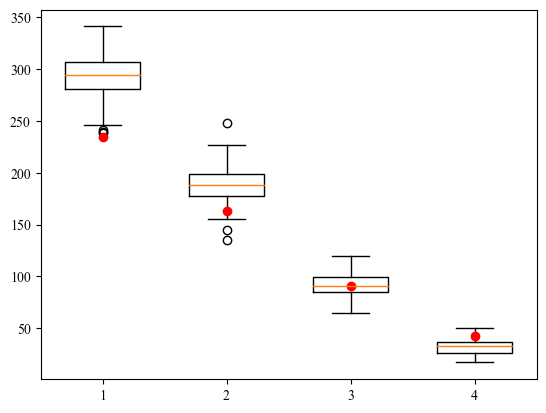

In [ ]:
plt.boxplot(num_ret_snl.T, positions=range(1, 5), widths=0.6)
plt.scatter(range(1, 5), x_obs[::12], color='red', zorder=2, label='observed')
plt.savefig(f'plots/ppc_numret_snl.pdf', bbox_inches='tight')

In [ ]:
thetas_rnpe = thetas_rnpe.reshape((10000, -1))

In [ ]:
lags = [1, 2, 4, 8]
X = observed_df
non_ret = {}
thd = 10
n_lag_sims = 100

num_ret = np.zeros((len(lags), n_lag_sims))
for ii, lag in enumerate(lags):
    disp = X[lag:, :] - X[:-lag, :]
    non_ret[f'lag_{str(lag)}'] = sorted(np.log([step for step in jnp.abs(disp).flatten() if step > thd]))
    print(len(non_ret[f'lag_{str(lag)}']))
    xs = np.linspace(np.min(non_ret[f'lag_{str(lag)}']), np.max(non_ret[f'lag_{str(lag)}']), 30)
    kde = gaussian_kde(non_ret[f'lag_{str(lag)}'])
    plt.plot(xs, kde(xs), label=f'lag {lag}')
    for j in range(n_lag_sims):
        key, sub_key = random.split(key)
        X_i = dgp(sub_key, thetas_rnpe[j, 0], thetas_rnpe[j, 1], thetas_rnpe[j, 2], model=2)
        X_i = X_i.at[nan_idx].set(jnp.nan)
        disp_i = X_i[lag:, :] - X_i[:-lag, :]
        disp_i = jnp.abs(disp_i)
        ret = disp_i < thd
        num_ret_j = np.sum(ret)
        num_ret[ii, j] = num_ret_j
        non_ret_i = sorted(np.log([step for step in disp_i.flatten() if step > thd]))
        xs = np.linspace(np.min(non_ret_i), np.max(non_ret_i), 30)
        kde = gaussian_kde(non_ret_i)
        plt.plot(xs, kde(xs), label=f'lag {lag}', alpha=0.1)
    plt.savefig(f'plots/ppc_lag_{str(lag)}_rnpe.pdf', bbox_inches='tight')
    plt.clf()

370
324
220
127


<Figure size 640x480 with 0 Axes>

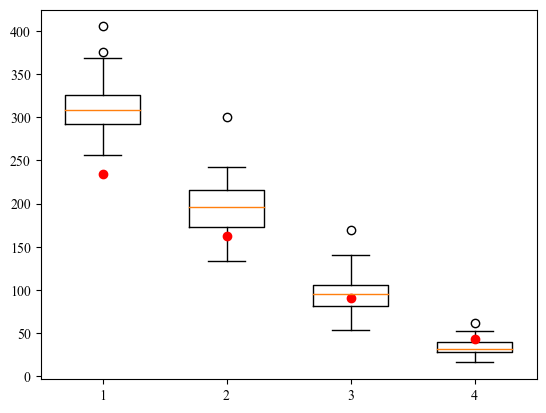

In [ ]:
plt.boxplot(num_ret.T, positions=range(1, 5), widths=0.6)
plt.scatter(range(1, 5), x_obs[::12], color='red', zorder=2, label='observed')
plt.savefig(f'plots/ppc_numret_rnpe.pdf', bbox_inches='tight')

In [ ]:
thetas_rbsl  = scipy.io.loadmat('../res/external_res/results_bsl_model2_realdata_mean_n500.mat')['theta']

In [ ]:
lags = [1, 2, 4, 8]
X = observed_df
non_ret = {}
thd = 10
n_lag_sims = 100
key = random.PRNGKey(0)
num_ret = np.zeros((len(lags), n_lag_sims))
for ii, lag in enumerate(lags):
    disp = X[lag:, :] - X[:-lag, :]
    non_ret[f'lag_{str(lag)}'] = sorted(np.log([step for step in jnp.abs(disp).flatten() if step > thd]))
    print(len(non_ret[f'lag_{str(lag)}']))
    xs = np.linspace(np.min(non_ret[f'lag_{str(lag)}']), np.max(non_ret[f'lag_{str(lag)}']), 30)
    kde = gaussian_kde(non_ret[f'lag_{str(lag)}'])
    plt.plot(xs, kde(xs), label=f'lag {lag}')
    for j in range(n_lag_sims):
        key, sub_key = random.split(key)
        X_i = dgp(sub_key, thetas_rbsl[j, 0], thetas_rbsl[j, 1], thetas_rbsl[j, 2], model=2)
        X_i = X_i.at[nan_idx].set(jnp.nan)
        disp_i = X_i[lag:, :] - X_i[:-lag, :]
        disp_i = jnp.abs(disp_i)
        ret = disp_i < thd
        num_ret_j = np.sum(ret)
        num_ret[ii, j] = num_ret_j
        non_ret_i = sorted(np.log([step for step in disp_i.flatten() if step > thd]))
        xs = np.linspace(np.min(non_ret_i), np.max(non_ret_i), 30)
        kde = gaussian_kde(non_ret_i)
        plt.plot(xs, kde(xs), label=f'lag {lag}', alpha=0.1)
    plt.savefig(f'plots/ppc_lag_{str(lag)}_rbsl.pdf', bbox_inches='tight')
    plt.clf()

370
324
220
127


<Figure size 640x480 with 0 Axes>

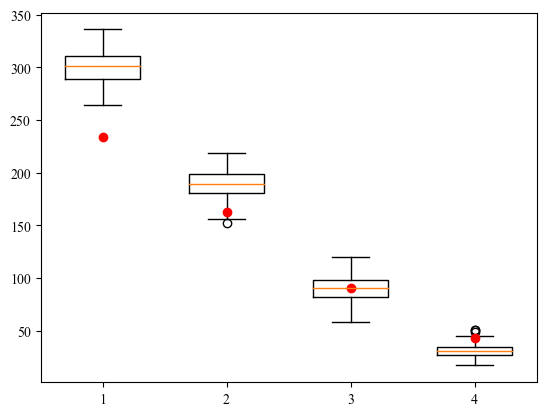

In [ ]:
plt.boxplot(num_ret.T, positions=range(1, 5), widths=0.6)
plt.scatter(range(1, 5), x_obs[::12], color='red', zorder=2, label='observed')
plt.savefig(f'plots/ppc_numret_rbsl.pdf', bbox_inches='tight')